<a href="https://colab.research.google.com/github/paulet-art/Machine-Learning-Collection/blob/master/LacunaChallenge_model_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install gdown
!gdown https://drive.google.com/uc?id=16T40TdpaB8VXohm50SySREwrzbuPcJBC


Downloading...
From (original): https://drive.google.com/uc?id=16T40TdpaB8VXohm50SySREwrzbuPcJBC
From (redirected): https://drive.google.com/uc?id=16T40TdpaB8VXohm50SySREwrzbuPcJBC&confirm=t&uuid=5aaee58d-5f1d-4e5c-9a22-d1cf8e7360f7
To: /content/images.zip
100% 4.29G/4.29G [01:03<00:00, 67.6MB/s]


In [ ]:
!unzip images.zip -d /content/

Archive:  images.zip
replace /content/id_9sdpy03kw1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

# Specify the path where the images were unzipped
unzip_directory_path = '/content/'

# List all files and folders in the unzipped directory
def list_directory_contents(directory):
    try:
        files = os.listdir(directory)
        print("Contents of the directory:")
        for file in files:
            print(file)
    except FileNotFoundError:
        print("The specified directory does not exist.")

list_directory_contents(unzip_directory_path)


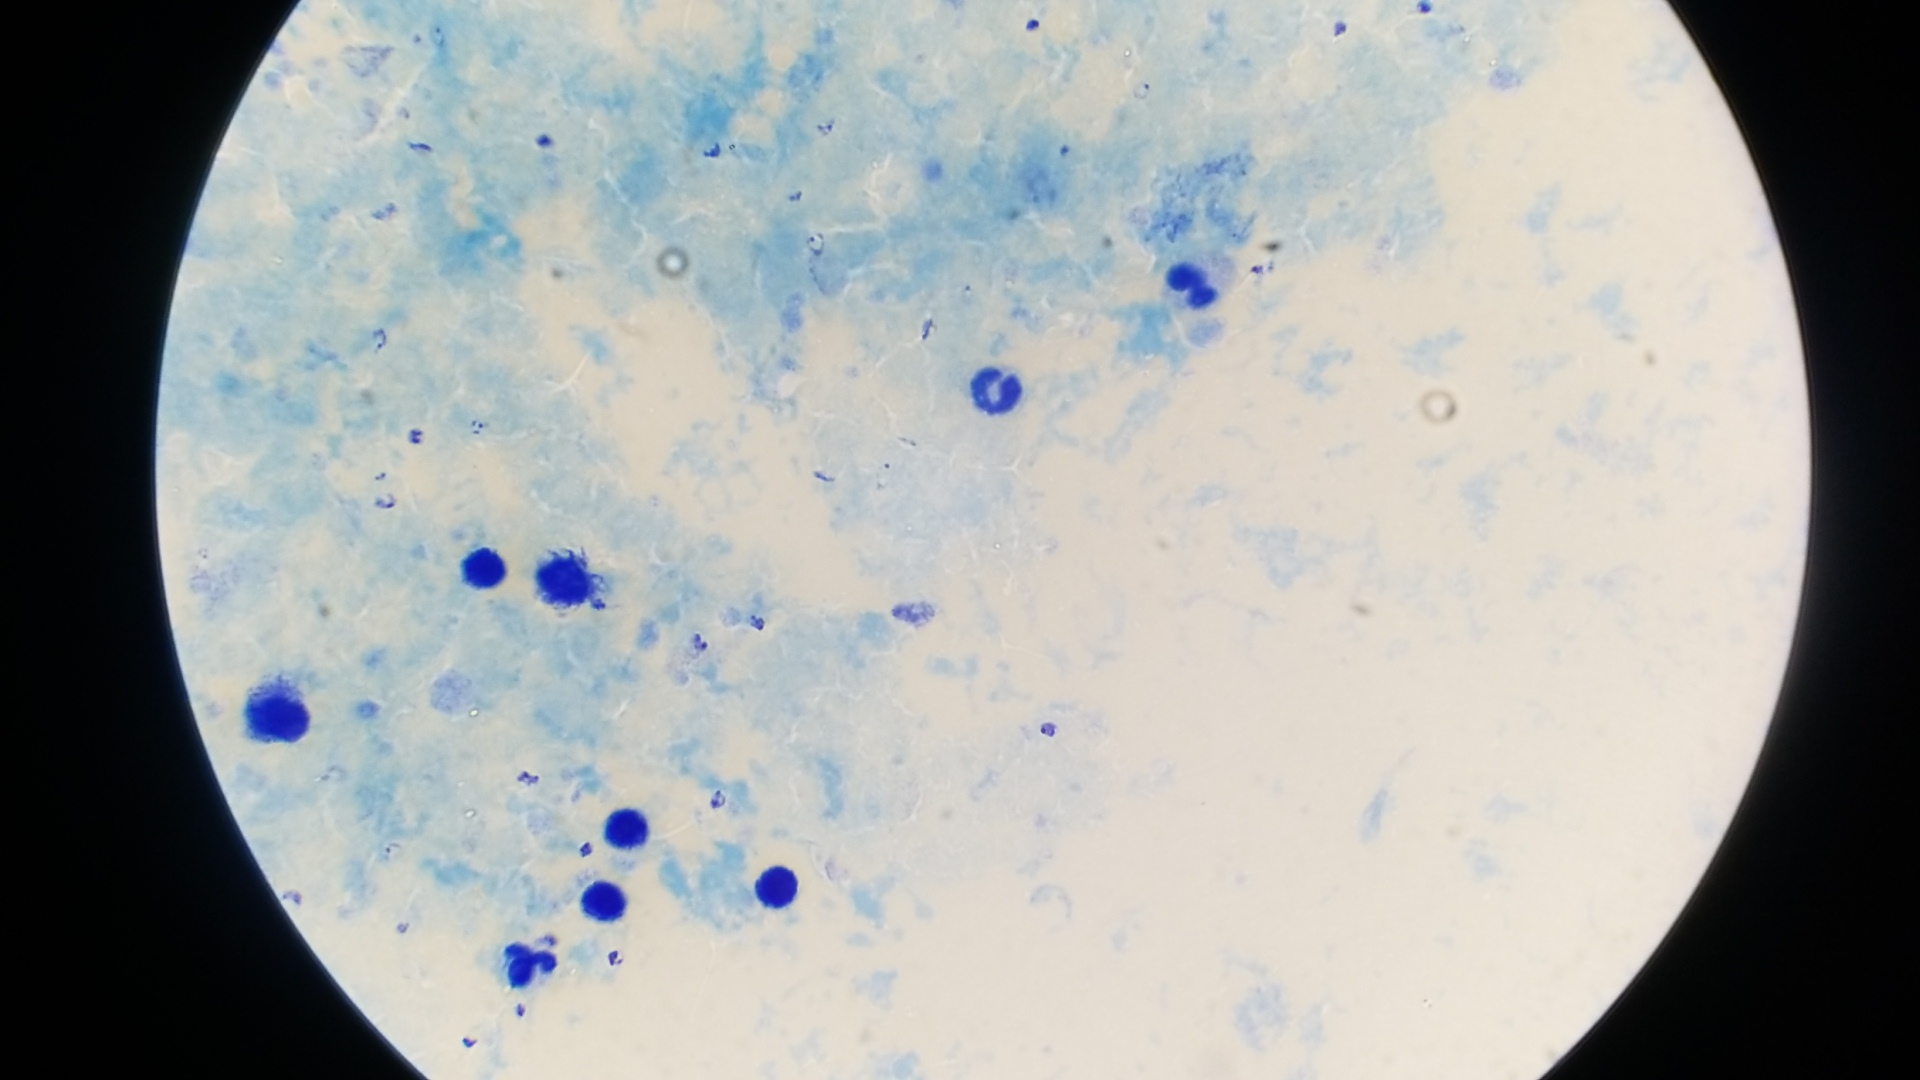

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/id_u7424e0jbz.jpg')

if img is None:
    print("Image not found or unable to load.")
else:
    cv2_imshow(img)


In [7]:
# Function to check image properties
def image_properties(img):
    if img is not None:
        height, width, channels = img.shape
        print(f"Image Dimensions: Width = {width}px, Height = {height}px, Channels = {channels}")
        print(f"Image Type: {img.dtype}")
    else:
        print("Image not found")

# Call the function with the loaded image
image_properties(img)

Image Dimensions: Width = 1920px, Height = 1080px, Channels = 3
Image Type: uint8


# ** Preprocessing**

In [9]:
# Resize the image
resized_image = cv.resize(img, (512, 512))
print(f"Resized Image Dimensions: {resized_image.shape}")

Resized Image Dimensions: (512, 512, 3)


In [10]:
# image to grayscale
gray_image = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
print(f"Grayscale Image Dimensions: {gray_image.shape}")

Grayscale Image Dimensions: (512, 512)


In [11]:
# Gaussian blur to reduce noise
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)
print("Applied Gaussian Blur")

Applied Gaussian Blur


In [12]:
# Normalize pixel values
normalized_image = blurred_image / 255.0
print(f"Normalized Image Pixel Range: Min={normalized_image.min()}, Max={normalized_image.max()}")

Normalized Image Pixel Range: Min=0.0, Max=0.9058823529411765


In [17]:
# normalized image to the range [0, 255] for display
display_image = (normalized_image * 255).astype('uint8')

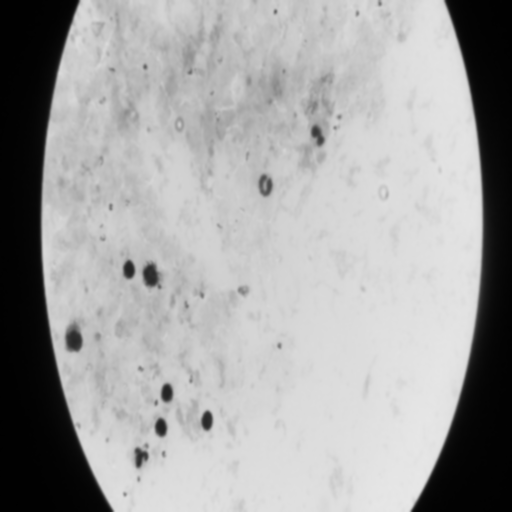

In [18]:
# Display the processed image using cv2_imshow
cv2_imshow(display_image)

## Detecting Cells Using Contours

In [19]:
# Apply binary thresholding to highlight cells
def apply_threshold(img):
    _, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    print("Applied Thresholding")
    return binary_img

binary_image = apply_threshold(blurred_image)

Applied Thresholding


In [21]:
def find_contours(binary_img):
    contours, _ = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    print(f"Found {len(contours)} contours")
    return contours

contours = find_contours(binary_image)

Found 20 contours


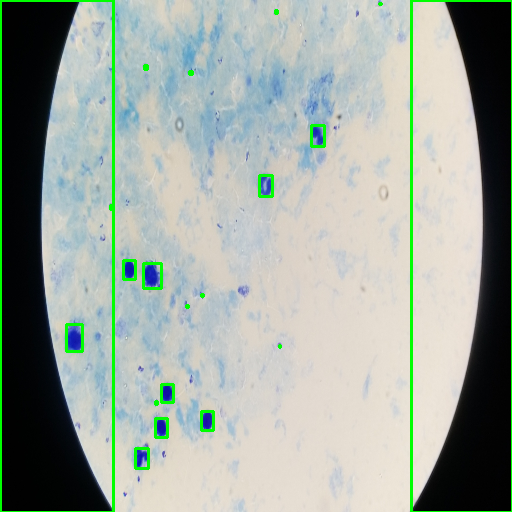

In [25]:
# bounding boxes around detected cells
def draw_bounding_boxes(original_img, contours):
    output_img = original_img.copy()
    for contour in contours:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green rectangle
    return output_img

# bounding boxes on the resized image
image_with_boxes = draw_bounding_boxes(resized_image, contours)

# Display the image with bounding boxes
cv2_imshow(image_with_boxes)